In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import acquire as acq
import prepare as prep

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
t_train, t_validate, t_test = prep.get_prep_split_titanic()

In [3]:
t_train

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,male,0,0,7.8958,C,1,1,0,0
380,380,1,1,female,0,0,227.5250,C,1,0,0,0
492,492,0,1,male,0,0,30.5000,S,1,1,0,1
55,55,1,1,male,0,0,35.5000,S,1,1,0,1
243,243,0,3,male,0,0,7.1250,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
695,695,0,2,male,0,0,13.5000,S,1,1,0,1
128,128,1,3,female,1,1,22.3583,C,0,0,0,0
636,636,0,3,male,0,0,7.9250,S,1,1,0,1
222,222,0,3,male,0,0,8.0500,S,1,1,0,1


In [4]:
col_cat = [] #this is for my categorical varibles
col_num = [] #this is for my numeric varibles

for col in t_train.columns[:-3]:
    print(col)
    if t_train[col].dtype == 'O':
        col_cat.append(col)
    else:
        if len(t_train[col].unique()) < 4: #making anything with less than 4 unique values a catergorical value
            col_cat.append(col)
        else:
            col_num.append(col)

passenger_id
survived
pclass
sex
sibsp
parch
fare
embarked
alone


SURVIVED
0    329
1    205
Name: survived, dtype: int64
0    0.616105
1    0.383895
Name: survived, dtype: float64


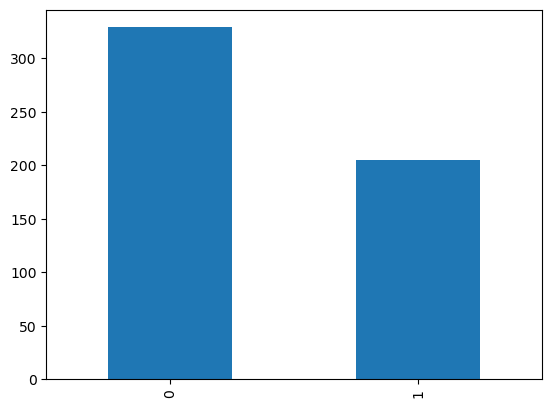


PCLASS
3    295
1    122
2    117
Name: pclass, dtype: int64
3    0.552434
1    0.228464
2    0.219101
Name: pclass, dtype: float64


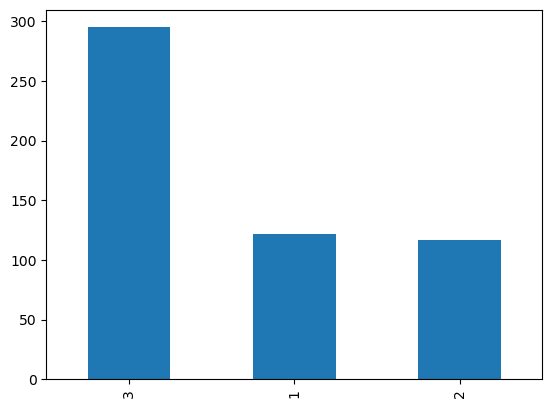


SEX
male      348
female    186
Name: sex, dtype: int64
male      0.651685
female    0.348315
Name: sex, dtype: float64


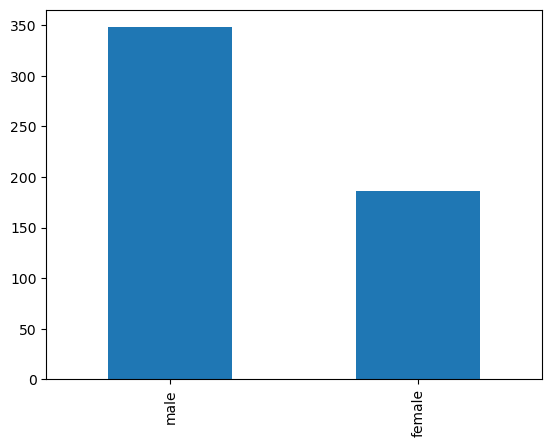


EMBARKED
S    381
C    107
Q     46
Name: embarked, dtype: int64
S    0.713483
C    0.200375
Q    0.086142
Name: embarked, dtype: float64


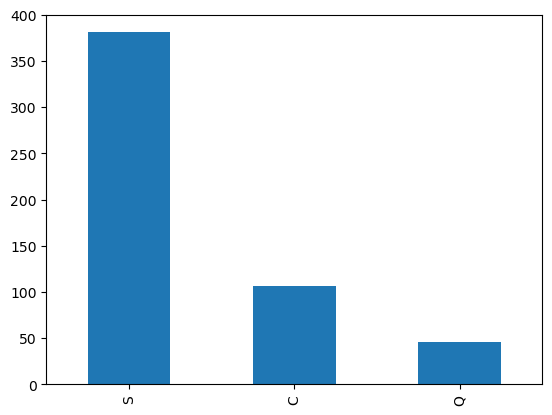


ALONE
1    335
0    199
Name: alone, dtype: int64
1    0.627341
0    0.372659
Name: alone, dtype: float64


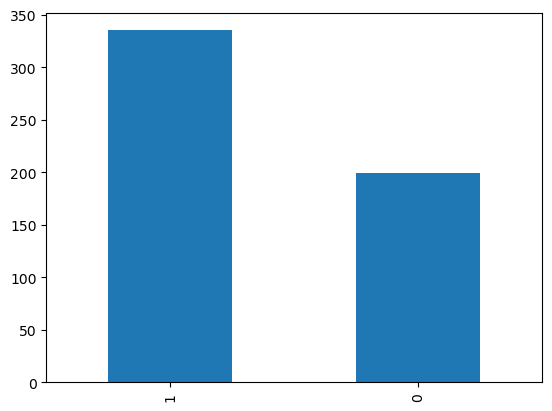

In [5]:
for col in col_cat:
    print(col.upper())
    print(t_train[col].value_counts())
    print(t_train[col].value_counts(normalize=True))
    t_train[col].value_counts().plot.bar()
    plt.show()
    print()

Takeaways

there are no noteable issues
these are my categorical variables
survived is my target variable, and has more people who didn't survive

In [6]:
for col in col_num:
    print(col.upper())
    print(train[col].value_counts())
    print(train[col].hist())
    plt.show()

PASSENGER_ID


NameError: name 'train' is not defined

Takeaways

fare is not a normal distribution
for fare, in the future, bin higher values, and see if it is normally distributed
sibsp and parch has some outliers
sibsp and parch also have high number of discrete values, maybe we'll bin these in the future

Explore Conclusions
note: this is a summary of all of our takeaways in the explore section

passenger class affected survival rates
fare also affected survival rates
males survived way less than females, and were least likely to survive when traveling alone

What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [ ]:
t_train.survived.value_counts()

In [8]:
baseline_accuracy = 329 / 534
t_train

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,male,0,0,7.8958,C,1,1,0,0
380,380,1,1,female,0,0,227.5250,C,1,0,0,0
492,492,0,1,male,0,0,30.5000,S,1,1,0,1
55,55,1,1,male,0,0,35.5000,S,1,1,0,1
243,243,0,3,male,0,0,7.1250,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
695,695,0,2,male,0,0,13.5000,S,1,1,0,1
128,128,1,3,female,1,1,22.3583,C,0,0,0,0
636,636,0,3,male,0,0,7.9250,S,1,1,0,1
222,222,0,3,male,0,0,8.0500,S,1,1,0,1


In [9]:
baseline_accuracy

0.6161048689138576

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



In [13]:
target = "survived"

In [14]:
# only x and y train
x_train = t_train.drop(columns=["survived", "sex", "passenger_id", "embarked"])

x_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0
492,1,0,0,30.5000,1,1,0,1
55,1,0,0,35.5000,1,1,0,1
243,3,0,0,7.1250,1,1,0,1


In [15]:
y_train = t_train[target]

y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

In [16]:
# validate 
x_validate = t_validate.drop(columns=["survived", "sex", "passenger_id", "embarked"])

y_validate = t_validate[target]

# test
x_test = t_test.drop(columns=["survived", "sex", "passenger_id", "embarked"])

y_test = t_test[target]

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [17]:
train_clf = DecisionTreeClassifier()

In [18]:
train_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [19]:
train_clf.score(x_train, y_train)

0.9456928838951311

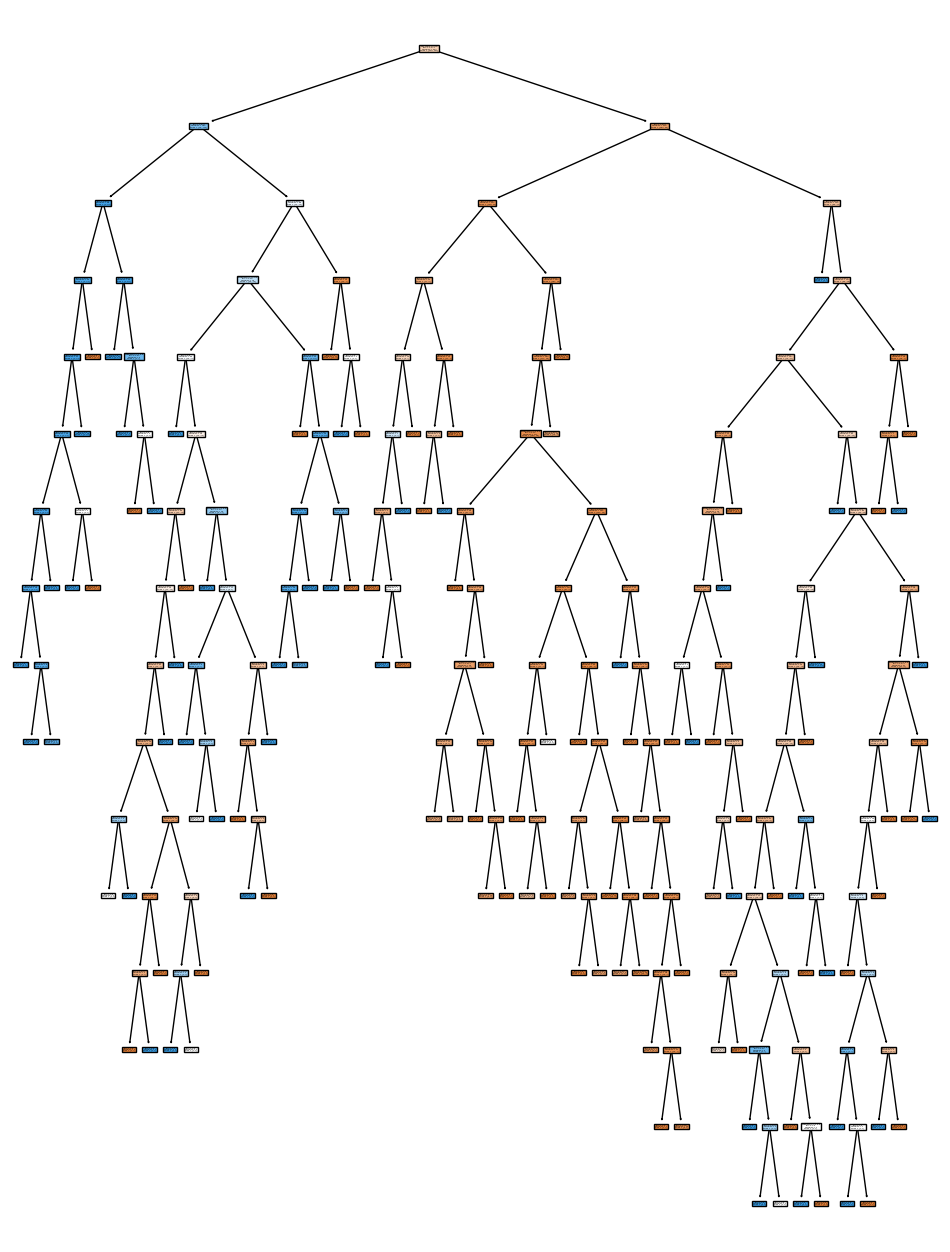

In [22]:
#see the tree that was built
#plot_tree
plt.figure(figsize=(12,16))
plot_tree(train_clf, #our fitted object
         feature_names=x_train.columns, #puts in our features for the questions
           #enters the selected class
          filled=True #colors our leaves and branches based on the class
         )
plt.show()

In [ ]:
train_clf.score(x_validate, y_validate)

In [ ]:
tree1 = DecisionTreeClassifier(max_depth=8)
tree1


In [ ]:
tree1.fit(x_train, y_train)

In [ ]:
#evaluate on train
tree1.score(x_train, y_train)

In [ ]:
#see the tree that was built
plt.figure(figsize=(8,8))
plot_tree(tree1, #our fitted object
         #enters the selected class
          filled=True #colors our leaves and branches based on the class
         )
plt.show()

In [ ]:
tree1.score(x_validate, y_validate)

In [ ]:
#see predictions
tree1.predict(x_train)[:100]

In [ ]:
tree1.predict_proba(x_train)[:5]

In [ ]:
#y_true 
y_train.head()

In [ ]:
y_pred = tree1.predict(x_train)
y_pred[:5]

In [ ]:
#generate confusion matrix!
confusion_matrix(y_train, y_pred)

In [ ]:
#find labels in our dataset & sort
labels = sorted(y_train.unique())
labels

In [ ]:
#make pretty with df
pd.DataFrame(confusion_matrix(y_train, y_pred),
            index=[f"{label} + _actual"for label in labels],
            columns=[f"{label} + '_predict" for label in labels])

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
#score our validate
tree1.score(x_validate, y_validate)

In [ ]:
#create using max_leaf_nodes
tree2 = DecisionTreeClassifier(max_leaf_nodes=9)

#fit
tree2.fit(x_train, y_train)

#transform
tree2.score(x_train, y_train)

In [ ]:
#plot the tree!
plot_tree(tree2, #our fitted object
         feature_names=x_train.columns, #enters the selected class
          filled=True #colors our leaves and branches based on the class
         )
plt.show()

Run through steps 2-4 using a different max_depth value.

Which model performs better on your in-sample data?

Which model performs best on your out-of-sample data, the validate set?

In [ ]:
#evaluate on validate
tree2.score(x_validate, y_validate)

In [ ]:
# max leaf nodes = 8,9 - 79% 10- 76% 
#set features i found in exploration
features = ['sex_male', 'pclass']
features1 = ['alone', 'pclass']
features


In [ ]:
t_train.head()

In [ ]:
#create
tree3 = DecisionTreeClassifier()

#fit 
#with features
tree3.fit(x_train[features1], y_train)

#transform 
#with features
tree3.score(x_train[features1], y_train)

In [ ]:
#evaluate on validate 
#with features
tree3.score(x_validate[features1], y_validate)

In [ ]:
# (sex, pclass )train- 79 val -77
# ['fare', 'pclass'] 84% 70%
# ['sex_male', 'fare'] 92% 75%
# ['alone', 'sex'] 79% 77%
# ['alone', 'pclass'] 69% 69%

In [ ]:
tree4 = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=9)

In [ ]:
#fit
tree4.fit(x_train, y_train)

#transform
tree4.score(x_train, y_train)

In [ ]:
tree4.score(x_validate, y_validate)

In [ ]:
# FINAL model test
tree4.score(x_test, y_test)

In [38]:
tel_train, tel_validate, tel_test = prep.get_prep_split_telco()                                              

In [39]:
tel_train.columns

Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'gender_Male', 'partner_Yes', 'dependents_Yes', 'paperless_billing_Yes',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check', 'tech_support_No internet service',
       'tech_support_Yes', 'churn_Yes'],
      dtype='object')

In [40]:
tel_train.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,paperless_billing_Yes,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,tech_support_No internet service,tech_support_Yes,churn_Yes
5911,0,26,39.95,1023.75,1,0,1,1,0,0,0,0,0,0,0,0
2479,0,47,26.90,1250.85,0,1,0,0,0,1,0,1,0,1,0,0
5889,0,1,50.45,50.45,0,0,0,1,0,0,0,0,1,0,0,1
6087,0,69,60.05,4176.70,1,0,0,1,0,0,0,0,0,0,1,0
785,0,51,87.55,4475.90,0,0,0,0,1,0,1,0,0,0,0,0


In [41]:
tel_train.churn_Yes.value_counts()

0    3104
1    1121
Name: churn_Yes, dtype: int64

In [42]:
tel_baseline_accuracy = 3104/(3140 + 1121)

In [43]:
tel_baseline_accuracy

0.7284674958929829

In [44]:
tel_x_train = tel_train.iloc[:,:-1]

In [45]:
#repeat for validate and test
tel_x_validate = tel_validate.iloc[:,:-1]
tel_X_test = tel_test.iloc[:,:-1]

In [46]:
target = "churn_Yes"

In [50]:
#notice im sending in a single column name
tel_y_train = tel_train[target]
y_train.head()

#repeat for validate and test
tel_y_validate = tel_validate[target]
tel_y_test = tel_test[target]

In [56]:
def max_depth_function(x_train=x_train, y_train=y_train, x_validate=x_validate, y_validate=y_validate):
    for x in range(1,20):
            print(x)
            tree = DecisionTreeClassifier(max_depth=x)
            tree.fit(x_train, y_train)
            acc = tree.score(x_train, y_train)
            #validate
            val_acc = tree.score(x_validate, y_validate)
            print(f"The max depth is {x} and accuracy is {round(acc, 2)} the validation accuracy is {round(val_acc, 2)}")

In [110]:
def max_depth_function(x_train=x_train, y_train=y_train, x_validate=x_validate, y_validate=y_validate):
    lst = []
    for x in range(1,20):
        tree = DecisionTreeClassifier(max_depth=x)
        tree.fit(x_train, y_train)
        acc = tree.score(x_train, y_train)
        #validate
        val_acc = tree.score(x_validate, y_validate)
        y = f"max depth- {x} accuracy- {round(acc, 2)} validation accuracy {round(val_acc, 2)}"
        
        lst.append(y)
        for i in lst:
            
    return lst


In [111]:
max_depth_function(tel_x_train, tel_y_train, tel_x_validate, tel_y_validate)

['max depth- 1 accuracy- 0.73 validation accuracy 0.73',
 'max depth- 2 accuracy- 0.79 validation accuracy 0.79',
 'max depth- 3 accuracy- 0.79 validation accuracy 0.79',
 'max depth- 4 accuracy- 0.79 validation accuracy 0.8',
 'max depth- 5 accuracy- 0.81 validation accuracy 0.79',
 'max depth- 6 accuracy- 0.81 validation accuracy 0.79',
 'max depth- 7 accuracy- 0.82 validation accuracy 0.78',
 'max depth- 8 accuracy- 0.84 validation accuracy 0.77',
 'max depth- 9 accuracy- 0.86 validation accuracy 0.77',
 'max depth- 10 accuracy- 0.88 validation accuracy 0.74',
 'max depth- 11 accuracy- 0.9 validation accuracy 0.74',
 'max depth- 12 accuracy- 0.93 validation accuracy 0.73',
 'max depth- 13 accuracy- 0.94 validation accuracy 0.73',
 'max depth- 14 accuracy- 0.96 validation accuracy 0.72',
 'max depth- 15 accuracy- 0.97 validation accuracy 0.72',
 'max depth- 16 accuracy- 0.97 validation accuracy 0.71',
 'max depth- 17 accuracy- 0.98 validation accuracy 0.71',
 'max depth- 18 accuracy-